In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [ ]:
Url='https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'

titanic = pd.read_csv(url)
titanic.columns =['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch
(Parents/children aboard), and Fare to predict whether a passenger
survived.

NOTE:ThesolutionsharedthroughGithubshouldcontainthesource 

In [3]:
Url='https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'

titanic = pd.read_csv(Url)

In [4]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
tit=titanic[['Pclass','Sex','Age','SibSp','Parch','Fare','Survived']]

In [21]:
tit.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Survived      0
dtype: int64

In [22]:
tit['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

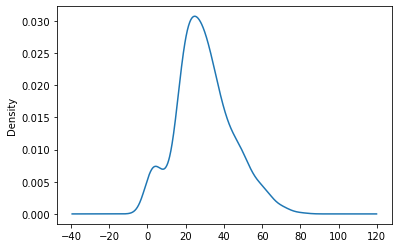

In [11]:
tit['Age'].plot(kind='kde')

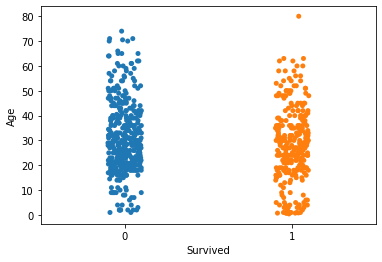

In [17]:
sb.stripplot('Survived','Age',data=tit)

In [23]:
tit['Age']=tit['Age'].fillna(tit['Age'].mean())

<ipython-input-23-b5a7c76ee2df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tit['Age']=tit['Age'].fillna(tit['Age'].mean())


In [24]:
tit

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.000000,1,0,7.2500,0
1,1,female,38.000000,1,0,71.2833,1
2,3,female,26.000000,0,0,7.9250,1
3,1,female,35.000000,1,0,53.1000,1
4,3,male,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,0
887,1,female,19.000000,0,0,30.0000,1
888,3,female,29.699118,1,2,23.4500,0
889,1,male,26.000000,0,0,30.0000,1


In [25]:
tit.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Survived    0
dtype: int64

In [36]:
tit1=pd.concat([pd.get_dummies(tit['Sex'],drop_first=True),tit],axis=1)

In [39]:
tit1.drop('Sex',inplace=True,axis=1)

In [43]:
tit1.isna().sum()

male        0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Survived    0
dtype: int64

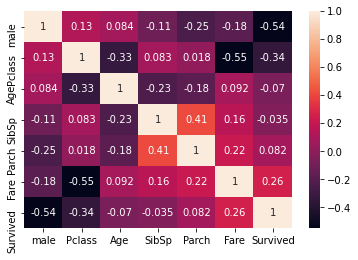

In [44]:
sb.heatmap(tit1.corr(),annot=True)

In [109]:
dc= DecisionTreeClassifier()

In [110]:
X=tit1.drop('Survived',axis=1)

In [111]:
Y=tit1['Survived']

In [112]:
X.head()

,male,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,0,1,38.0,1,0,71.2833
2,0,3,26.0,0,0,7.9250
3,0,1,35.0,1,0,53.1000
4,1,3,35.0,0,0,8.0500


In [113]:
sc= StandardScaler()

In [114]:
X_scaled = sc.fit_transform(X)

In [115]:
x_train,x_test,y_train,y_test= train_test_split(X_scaled,Y,test_size=0.25,random_state=242)

In [116]:
dc.fit(x_train,y_train)

DecisionTreeClassifier()

In [118]:
dc.score(x_train,y_train)

0.9820359281437125

In [119]:
dc.score(x_test,y_test)

0.7802690582959642

In [120]:
from sklearn.model_selection import cross_val_score

In [121]:
cross_val_score(dc,x_train,y_train,cv=5).mean()

0.7813937829648749

In [95]:
params={
    'criterion' :['gini','entropy'],
    'splitter' :['best','random'],
    'max_depth':[30,50,70,100],
    'max_leaf_nodes':range(2,15,1),
    'min_samples_split':range(2,20,1),
    'min_samples_leaf':range(1,10,1),
    'max_features' : ["auto", "sqrt", "log2"]
}

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
gd = GridSearchCV(estimator=dc,param_grid=params,cv=3,n_jobs=-1,verbose=3)

In [98]:
gd.fit(x_train,y_train)

Fitting 3 folds for each of 101088 candidates, totalling 303264 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 3600 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 13840 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 28176 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 46608 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done 69136 tasks      | elapsed:   59.6s
[Parallel(n_jobs=-1)]: Done 95760 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 126480 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 161296 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 200208 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 243216 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 290320 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 303264 out of 303264 | elapsed:  4.3min finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [30, 50, 70, 100],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': range(2, 15),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 20),
                         'splitter': ['best', 'random']},
             verbose=3)

In [122]:
gd.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=30, max_features='log2',
                       max_leaf_nodes=12, min_samples_split=8)

In [123]:
gd.best_score_

0.8202082520772023

In [125]:
gd.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 'log2',
 'max_leaf_nodes': 12,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'splitter': 'best'}

In [126]:
dc1=DecisionTreeClassifier(criterion='entropy', max_depth=30, max_features='log2',
                       max_leaf_nodes=12, min_samples_split=8)

In [127]:
dc1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=30, max_features='log2',
                       max_leaf_nodes=12, min_samples_split=8)

In [128]:
dc1.score(x_test,y_test)

0.7937219730941704

In [129]:
dc1.predict(sc.transform([[0,1,38,1,0,71.25]]))

array([1], dtype=int64)

In [135]:
#Before hyper parameter tuning

In [136]:
dc.score(x_test,y_test)

0.7802690582959642

In [137]:
#After hyper parameter tuning


In [138]:
dc1.score(x_test,y_test)

0.7937219730941704